In [7]:
import os
import numpy as np
import pandas as pd
from utils import k_means, kernel
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

> K-Means implementation can be found in `utils.py`

# Manual K-Means

In [2]:
df = pd.read_csv("./kmeans_data.txt", delim_whitespace=True, header=None)

In [3]:
def hand_crafted_feature(row:pd.Series):
    row = row.to_numpy()
    return np.dot(row, row)

[k_means] Done at iteration#1


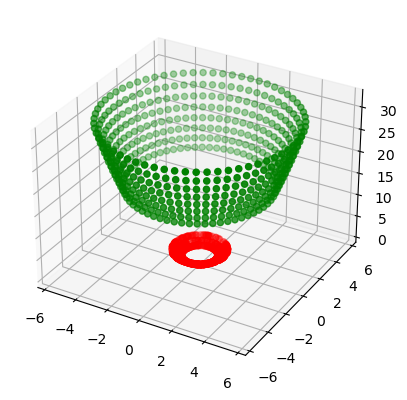

In [4]:
df[2] = df.apply(hand_crafted_feature, axis=1)
labels = k_means(df, 2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
df_1 = df[labels == 1]
df_0 = df[labels == 0]
ax.scatter(df_0[0], df_0[1], df_0[2], c='r', marker='o')
ax.scatter(df_1[0], df_1[1], df_1[2], c='g', marker='o')
plt.show()

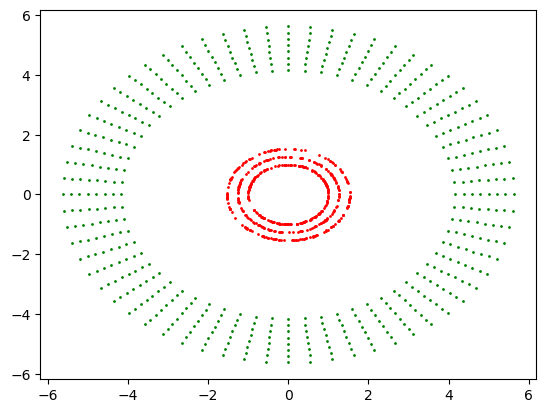

In [5]:
plt.figure()
plt.scatter(df_0[0], df_0[1], s=1, c='r')
plt.scatter(df_1[0], df_1[1], s=1, c='g')
plt.show()

# Landmark K-Means

In [6]:
df = pd.read_csv("./kmeans_data.txt", delim_whitespace=True, header=None)
n = len(df)
L = 1

In [8]:
def kernelized_vector(XL:pd.DataFrame, row:np.ndarray):
    Kvec = np.zeros((L))
    for i in range(L):
        Kvec[i] = kernel(XL.iloc[i].values, row)
    return Kvec

[k_means] Done at iteration#3
[k_means] Done at iteration#5
[k_means] Done at iteration#4
[k_means] Done at iteration#3
[k_means] Done at iteration#1
[k_means] Done at iteration#1
[k_means] Done at iteration#4
[k_means] Done at iteration#3
[k_means] Done at iteration#1
[k_means] Done at iteration#1


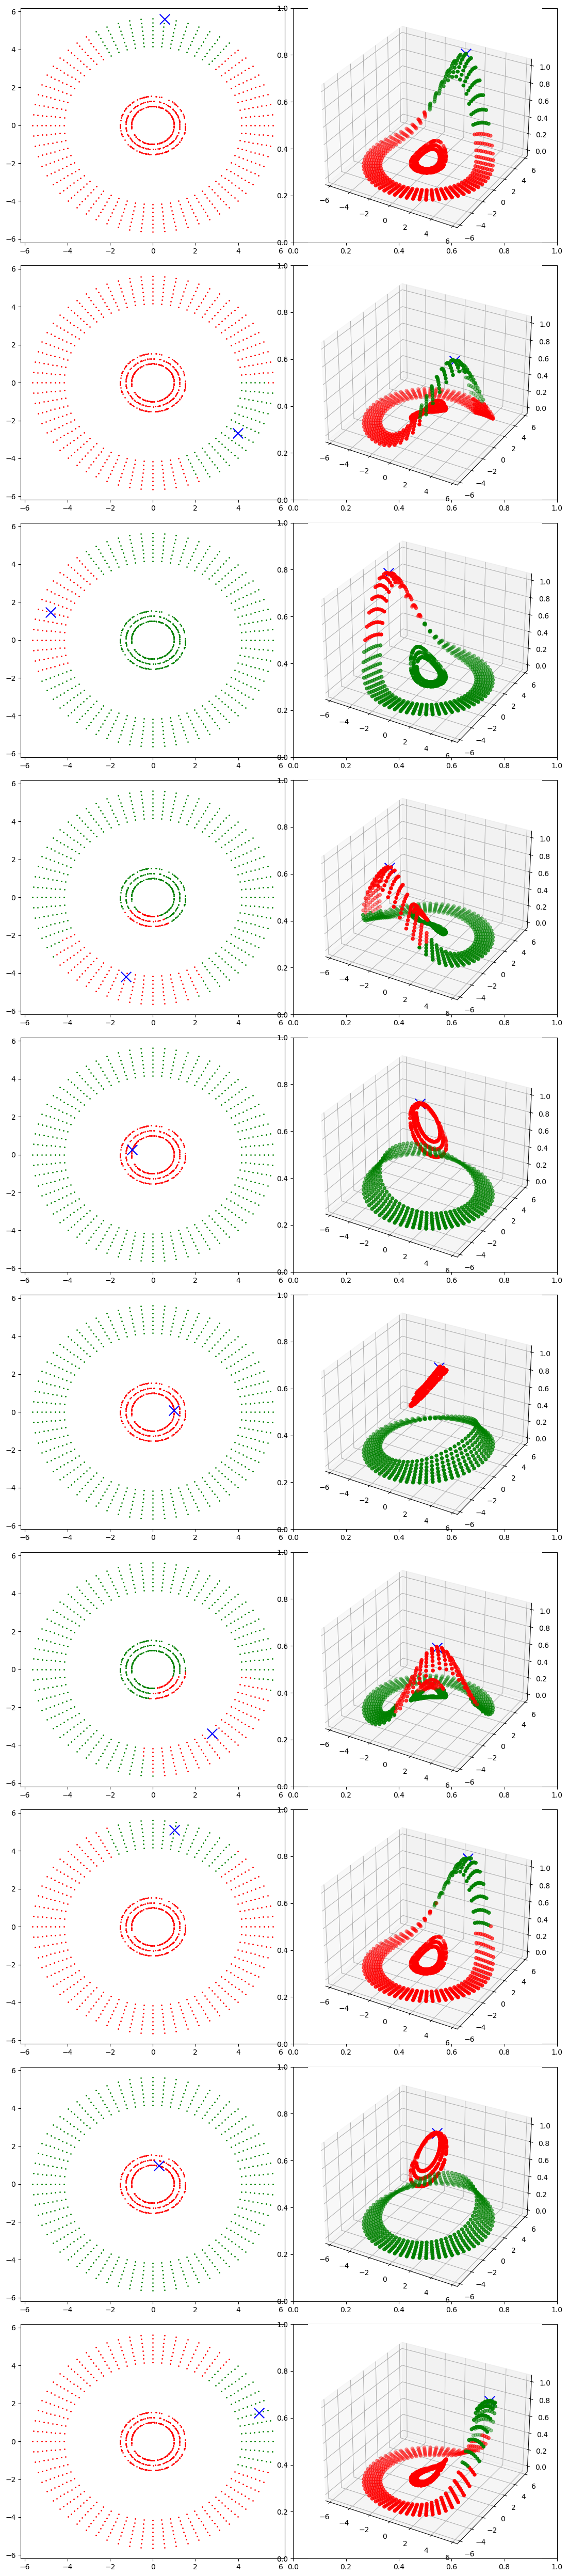

In [21]:
fig, axs = plt.subplots(10, 2, figsize=(11, 50))
for k in range(10):
    ax = axs[k, 0]
    XL = df.sample(n=L).reset_index(drop=True)
    X = np.zeros((n, L))
    for i in range(n):
        X[i] = kernelized_vector(XL, df.iloc[i].values)
    X = pd.DataFrame(X)
    labels = k_means(X, 2)
    df_1 = df[labels == 1]
    df_0 = df[labels == 0]
    ax.scatter(df_0[0], df_0[1], c='r', s=1)
    ax.scatter(df_1[0], df_1[1], c='g', s=1)
    ax.scatter(XL[0], XL[1], c="b", s=200, marker='x')
    ax = fig.add_subplot(10, 2, 2 * (k+1), projection='3d')
    ax.scatter(df_0[0], df_0[1], X[labels == 0], c='r', marker='o')
    ax.scatter(df_1[0], df_1[1], X[labels == 1], c='g', marker='o')
    ax.scatter(XL[0], XL[1], kernelized_vector(XL, XL.iloc[0].values), c="b", s=200, marker='x')
plt.tight_layout()
plt.show()